# Image Segmentation with Machine Learning

In [435]:
import torch
import cv2
import numpy as np
from torchvision.datasets import MNIST
from torchvision import transforms
import matplotlib.pyplot as plt

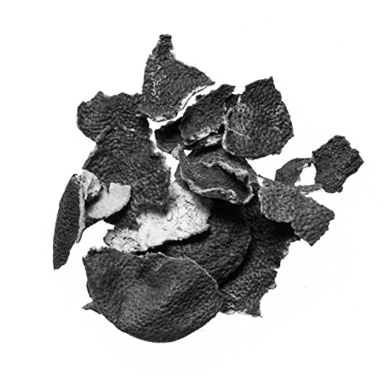

In [436]:
# sample_image = cv2.resize(mnist_train.data[0, :, :].numpy(), (560, 560))
sample_image = cv2.imread("orange_peel.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(sample_image, cmap = "gray")
plt.axis("off")
plt.show()

We apply various thresholding algorithms to the image.
- **Laplacian**: applies the Laplacian operator to the image (i.e., the second derivative)
- **Sobel**: applies the Sobel operator (i.e., the first derivative)
- **Morphologic opening**: apply morphological operations (e.g., erosion, dilation, opening, closing)
- **Otsu thresholding**: set pixel values to $0$ or the maximum value based on a threshold
  - <u>Otsu's binarization</u> determines an optimal value automatically by minimizing the **weighted within-class variance**

In [437]:
# apply Laplacian filter to sample image
laplacian = cv2.Laplacian(sample_image, cv2.CV_64F)

# apply Sobel operators to sample image
sobelx = cv2.Sobel(sample_image, cv2.CV_64F, 1, 0, ksize = 5)
sobely = cv2.Sobel(sample_image, cv2.CV_64F, 0, 1, ksize = 5)
sobel = cv2.addWeighted(cv2.convertScaleAbs(sobelx), 0.5, cv2.convertScaleAbs(sobely), 0.5, 0)

# morphologic opening
kernel = np.ones((10, 10), np.uint8)
opening = cv2.morphologyEx(sample_image, cv2.MORPH_OPEN, kernel)

# use Otsu to threshold
ret, otsu_thresh = cv2.threshold(sample_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

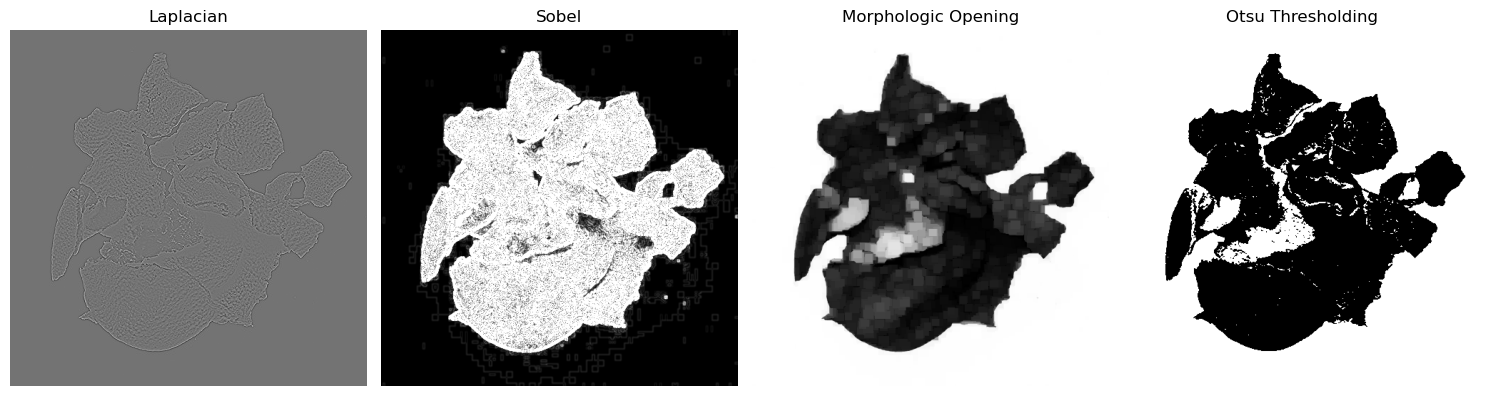

In [438]:
# plot images
fig, ax = plt.subplots(1, 4, figsize = (15, 10))
ax[0].imshow(laplacian, cmap = "gray")
ax[0].set_title("Laplacian")
ax[0].axis("off")
ax[1].imshow(sobel, cmap = "gray")
ax[1].set_title("Sobel")
ax[1].axis("off")
ax[2].imshow(opening, cmap = "gray")
ax[2].set_title("Morphologic Opening")
ax[2].axis("off")
ax[3].imshow(otsu_thresh, cmap = "gray")
ax[3].set_title("Otsu Thresholding")
ax[3].axis("off")
plt.tight_layout()
plt.show()

- `cv2.dialate()` increases the white region in the image (i.e., increases the boundary around foreground objects).
  - Increasing the kernel size increases the boundary but also amplifies noise
- `cv2.drawContours(<IMAGE>, <CONTOURS>, <CONTOUR_IDX>, <COLOR>, <THICKNESS)` draws the contours
  - if `CONTOUR_IDX` is set to $-1$, all contours in `CONTOURS` will be drawn
  - if `THICKNESS` is set to $-1$, a mask will be drawn instead of a boundary line
- Additional code:
  - `contours = sorted(contours, key = lambda x: cv2.contourArea(x))`: sort contours by their area
  - `contours = [ c for c in contours if cv2.contourArea(c) > 10000 and len(c) > 10 ]`: filter only contours with area greater than $10000$ and dimensions greater than $4$

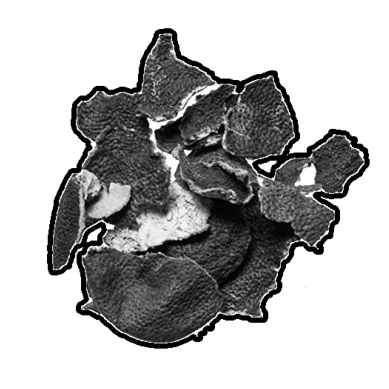

In [439]:
# attempt to draw boundary based on Sobel
_, thresh = cv2.threshold(sobel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) # apply threshold as well to Sobel
edges = cv2.dilate(thresh, np.ones((5, 5), np.uint8))

# find contours
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = max(contours, key = cv2.contourArea)
# contours = sorted(contours, key = lambda x: cv2.contourArea(x))
# contours = [ c for c in contours if cv2.contourArea(c) > 10000 and len(c) > 10 ]

# draw contours
cv2.drawContours(sample_image, [cnt], 0, (0, 0, 0), 5)

plt.imshow(sample_image, cmap = "gray")
plt.axis("off")
plt.show()

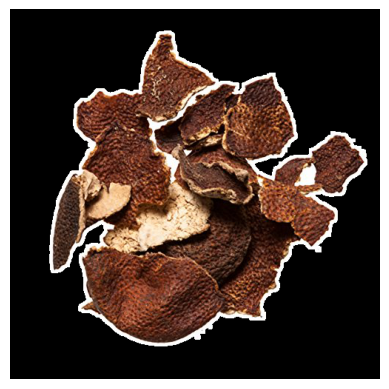

In [440]:
# load in image and mask it with the contour
image = cv2.imread("orange_peel.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = np.zeros(image.shape, dtype = np.uint8)
cv2.drawContours(mask, [cnt], 0, (255, 255, 255), -1)
masked_image = cv2.bitwise_and(image, mask)

plt.imshow(masked_image)
plt.axis("off")
plt.show()